In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from xgboost import XGBRegressor


%matplotlib inline

In [2]:
d_train = pd.read_csv('train.csv')
d_train.shape

(1460, 81)

In [3]:
d_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Observing the data

d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Finding out the null values

d_train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
df= d_train.isna().sum().sum()# total missing values
df

6965

In [7]:
len(d_train)/ df *100 # total missing values in percentages

20.96195262024408

<AxesSubplot:>

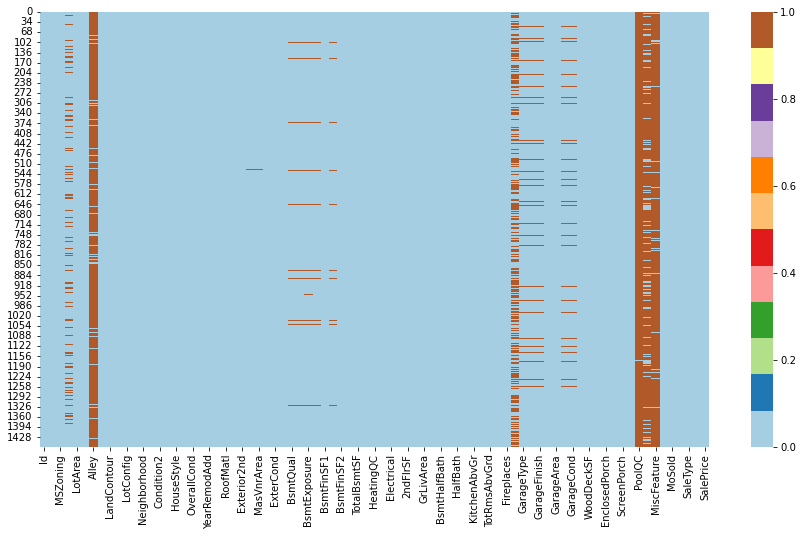

In [8]:
# Visualizing missing values in a dataset

plt.figure(figsize=(15,8))
sns.heatmap(d_train.isna(),cmap='Paired')

# Dealing with missed values

**Filling the columns below with None values**

In [9]:
d_train['PoolQC']= d_train['PoolQC'].fillna('None')
d_train['MiscFeature']= d_train['MiscFeature'].fillna('None')
d_train['Alley']= d_train['Alley'].fillna('None')
d_train['Fence']= d_train['Fence'].fillna('None')
d_train['FireplaceQu']= d_train['FireplaceQu'].fillna('None')

In [10]:
# Impute "LotFrotage" column with its mean values

d_train['LotFrontage'] = d_train['LotFrontage'].fillna(d_train['LotFrontage'].mean())

In [11]:
# Filling these columns with zero values

d_train['GarageYrBlt']= d_train['GarageYrBlt'].fillna(0)
d_train['MasVnrArea']= d_train['MasVnrArea'].fillna(0)

In [12]:
# Filling the missing data with most_frequent values

d_train['GarageCond'] = d_train['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_train['GarageType'] = d_train['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_train['GarageFinish'] = d_train['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_train['GarageQual'] = d_train['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_train['BsmtFinType2'] = d_train['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_train['BsmtExposure'] = d_train['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_train['BsmtQual'] = d_train['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_train['BsmtCond'] = d_train['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_train['BsmtFinType1'] = d_train['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_train['MasVnrType'] = d_train['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_train['Electrical'] = d_train['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())

In [13]:
# Lets check if we have any missed values left

d_train.isna().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

**So we cleaned our dataset with zero null vales left** 


In [14]:
d_train.shape

(1460, 81)

In [15]:
# Defining how required variables correlate to our target variable

corr = d_train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [16]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [37]:
#Visalizing our SalePrice column with all dataset columns to know how corralete to each other using avtoviz^^

#from autoviz.AutoViz_Class import AutoViz_Class
#av = AutoViz_Class()

#df = av.AutoViz(filename='',
 #               sep=',',
  #              dfte=d_train,
   #            depVar='SalePrice',
    #           chart_format='')

# Label Encoding 

In [18]:
label = LabelEncoder()
for i in d_train.columns:
    if d_train[i].dtypes == object:
        d_train[i]= label.fit_transform(d_train[i])

# Selecting the Features

In [19]:
X = d_train.drop('SalePrice', axis=1)
y = d_train['SalePrice']

# Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating Model with different functions

In [21]:
def decision_tree_model(X_train, y_train):
    # First using Decision Tree
    
    tree = DecisionTreeRegressor(random_state=1)
    tree.fit(X_train, y_train)
    y_prediction_tree = tree.predict(X_test)
    
    
    # metrics of decision tree regressor
    
    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_tree)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_tree)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_tree))
    
    print('Decision Tree: ', r2_score(y_test,y_prediction_tree))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)
    
    # Visualizing
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_tree,cmap='Paired',c='blue')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_tree), max(y_test))
    p2 = min(min(y_prediction_tree), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()


Decision Tree:  0.7661696898489476
Mean Absolute Error: 26753.23287671233
Mean Square Error: 1631689828.3835616
Root Mean Square Error: 40394.180625228204


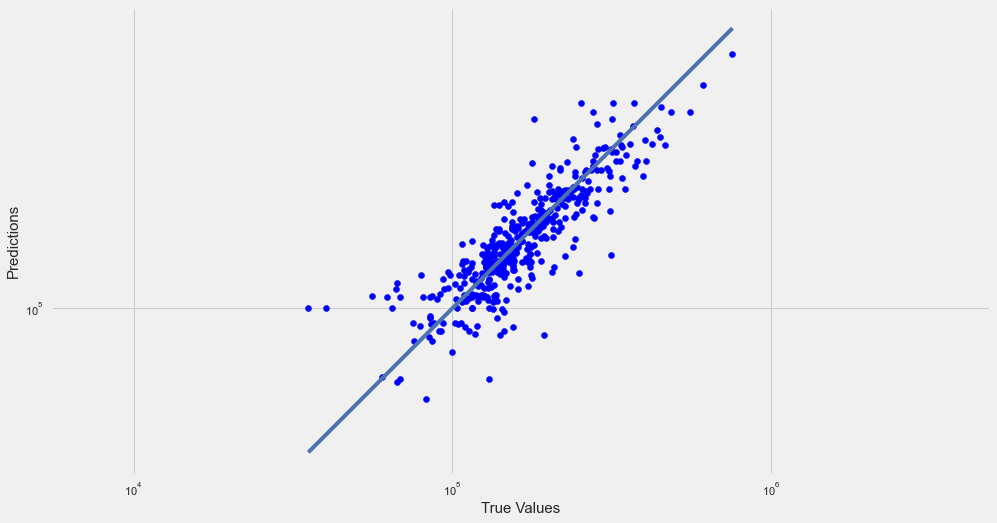

In [22]:
decision_tree_model(X_train, y_train)

In [23]:
def rand_forest(X_train, y_train):
    #using RandomForestRegressor
    
    forest = RandomForestRegressor(n_estimators=100, random_state=0)
    forest.fit(X_train, y_train)
    y_prediction_forest = forest.predict(X_test)
    
    # metrics of random forest 
    
    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_forest)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_forest)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_forest))
    
    # Printing
    
    print('Random Forest Regressor: ', r2_score(y_test,y_prediction_forest))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)
    
    # Visualizing
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_forest,cmap='Paired',c='brown')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_forest), max(y_test))
    p2 = min(min(y_prediction_forest), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Random Forest Regressor:  0.8938945468323075
Mean Absolute Error: 17137.108196347035
Mean Square Error: 740413800.7511126
Root Mean Square Error: 27210.54576356587


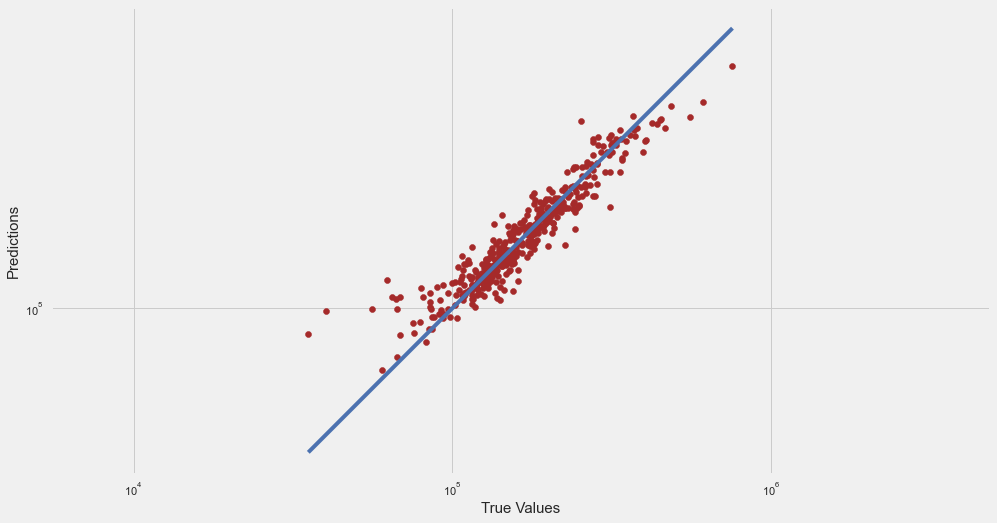

In [24]:
rand_forest(X_train, y_train)

In [25]:
def knnreg(X_train, y_train):
    # using knn Regressor
    
    knn = neighbors.KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_prediction_knn = knn.predict(X_test)
    
    # metrics of knn regressor
    
    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_knn)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_knn)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_knn))
    
    # Printing
    
    print('Knn neighbors Regressor: ', r2_score(y_test,y_prediction_knn))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)
    
    # Visualizing
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_knn,cmap='Paired',c='green')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_knn), max(y_test))
    p2 = min(min(y_prediction_knn), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Knn neighbors Regressor:  0.6748692476534716
Mean Absolute Error: 29896.73652968037
Mean Square Error: 2268792874.4388127
Root Mean Square Error: 47631.847270904924


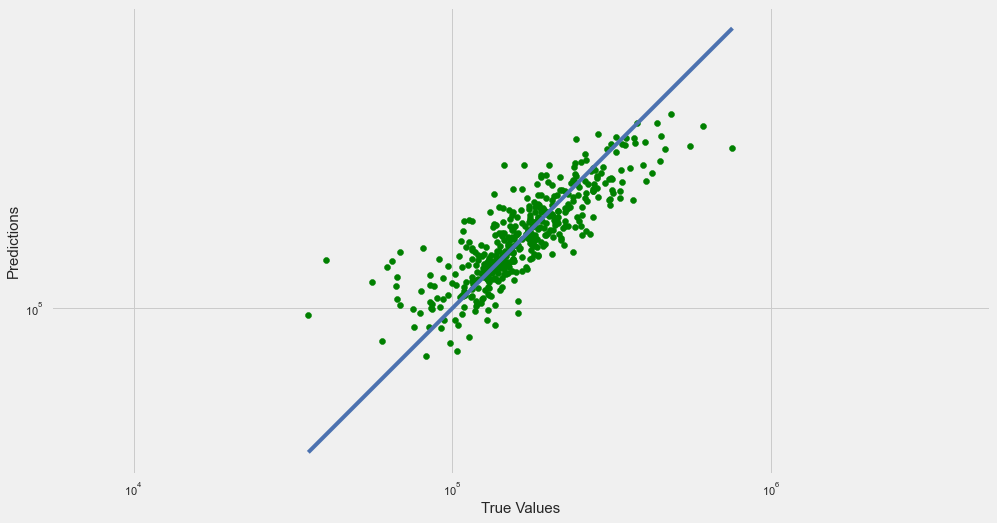

In [26]:
knnreg(X_train, y_train)

In [27]:
def xboost(X_train, y_train):
    # using xgboost regressor
    
    xgboost = XGBRegressor()
    xgboost.fit(X_train, y_train)
    y_pred_xgboost = xgboost.predict(X_test)
    
    # metrics of xgboost regressor
    
    MeanAbErr_tree = mean_absolute_error(y_test, y_pred_xgboost)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_xgboost)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))
    
    # Printing
    
    print('XGBoost Regressor: ', r2_score(y_test,y_pred_xgboost))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)
    
    # Visualizing
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_pred_xgboost,cmap='Paired',c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred_xgboost), max(y_test))
    p2 = min(min(y_pred_xgboost), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

XGBoost Regressor:  0.908909238086754
Mean Absolute Error: 16700.602739726026
Mean Square Error: 635639877.3860298
Root Mean Square Error: 25211.899519592527


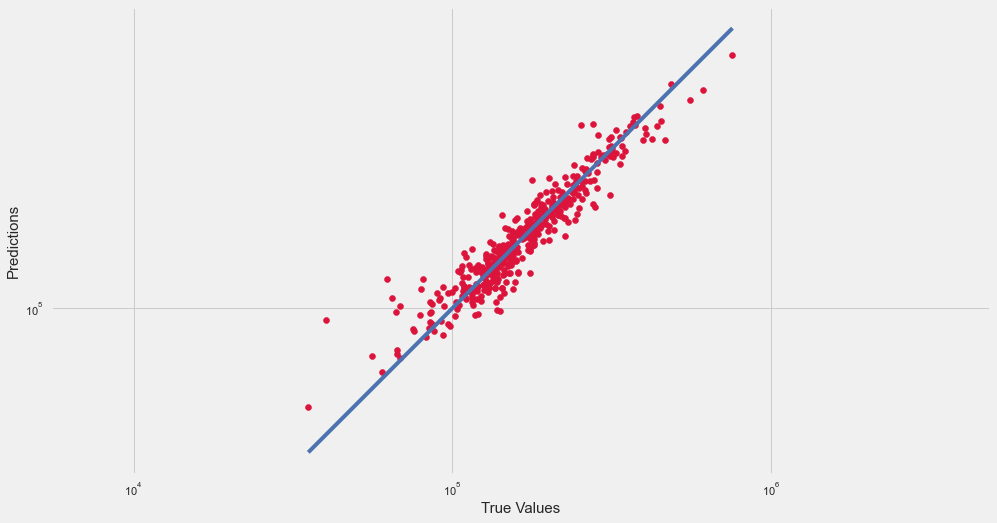

In [28]:
xboost(X_train, y_train)

In [29]:
def linear_reg(X_train, y_train):
    # using Linear regressor
    
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred_linear = lin.predict(X_test)
    
    # metrics of linear regressor
    
    MeanAbErr_tree = mean_absolute_error(y_test, y_pred_linear)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_linear)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))
    
    # Printing
    
    print('Linear Regressor: ', r2_score(y_test,y_pred_linear))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)
    
    # Visualizing
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_pred_linear,cmap='Paired')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred_linear), max(y_test))
    p2 = min(min(y_pred_linear), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Linear Regressor:  0.8445932522822595
Mean Absolute Error: 21821.475413174285
Mean Square Error: 1084442856.6570344
Root Mean Square Error: 32930.87998607135


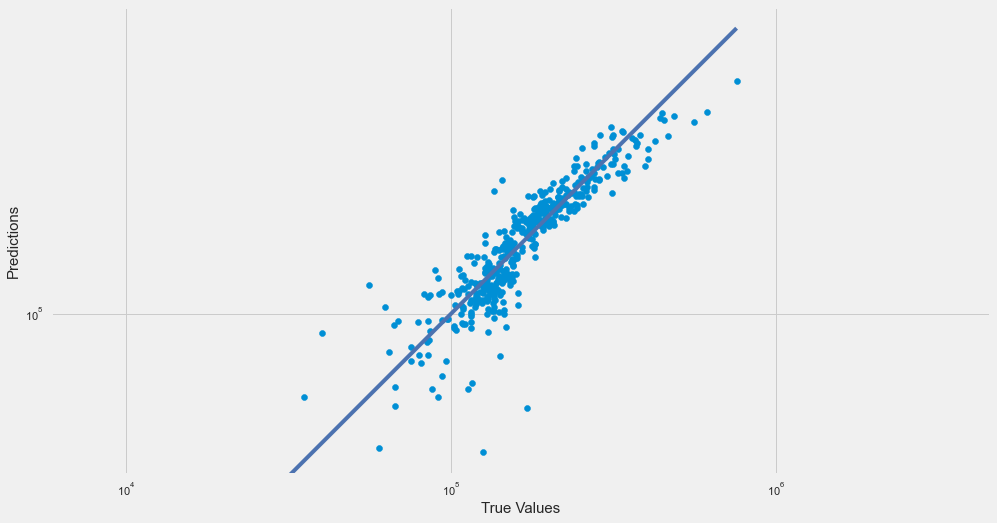

In [30]:
linear_reg(X_train, y_train)

**XGBoost and Random Forest Regressor are the best predictors with lowest errors.
But Im going to take XGBoost model for the submission ****

In [31]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
y_pred_xgboost.shape

(438,)

In [32]:
df1 = pd.read_csv('test.csv')

df1.shape

(1459, 80)

In [33]:
id_test = df1['Id']
df1 = pd.DataFrame(id_test, columns=['Id'])

In [34]:
prediction = pd.DataFrame(y_pred_xgboost, columns=["SalePrice"])

In [35]:
output = pd.concat([id_test, prediction],axis=1)

In [36]:
output.head()

,Id,SalePrice
0,1461,140287.671875
1,1462,362818.937500
2,1463,115460.523438
3,1464,155726.703125
4,1465,310617.468750
